## ALL

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    roc_auc_score, accuracy_score, confusion_matrix, roc_curve, 
    precision_score, recall_score, f1_score, matthews_corrcoef
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [14]:
##数据读入
mirna=pd.read_csv(r'./all_ori_new.csv',encoding='GBK')
mirna = mirna[mirna['group'].isin([1, 0])]
##分组
train_mirna = mirna[mirna.iloc[:, 0].str.startswith('train')]
test_mirna = mirna[mirna.iloc[:, 0].str.startswith('test')]

In [15]:
train_mirna

,allRNA,Hospital,Sample_id,Gender,Age,HAMD,Diagnosis,group,Company,Batch,...,piR-hsa-376663,piR-hsa-3784255,piR-hsa-4360657,piR-hsa-4404178,piR-hsa-4419732,piR-hsa-4493515,piR-hsa-737914,piR-hsa-7572632,piR-hsa-788844,piR-hsa-789156
309,train.Control_1,Tower,C1,0,35,3.0,Normal,0,HD,1,...,-1.308821,12.316997,3.579496,-0.875649,13.968535,14.903764,0.398738,-0.619059,0.722823,1.295271
310,train.Control_10,Tower,C10,1,44,5.0,Normal,0,HD,2,...,-0.657206,10.634296,7.485358,3.049388,13.318475,14.581954,5.877003,1.394044,5.696495,1.911182
311,train.Control_100,Tower,C100,0,47,2.0,Normal,0,HD,2,...,1.038110,11.512748,7.490458,0.900401,5.845997,8.883983,5.554986,3.484733,0.722823,3.604080
312,train.Control_101,Tower,C101,1,52,1.0,Normal,0,HD,2,...,0.579948,4.178236,3.579496,-0.197034,5.845997,12.084145,0.398738,4.120137,0.722823,4.524268
313,train.Control_102,Tower,C102,0,44,4.0,Normal,0,HD,2,...,0.143722,13.103104,3.579496,0.351906,5.845997,3.468737,0.398738,4.147326,0.722823,4.405022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,train.Depression_199,NJBrain,T92,0,22,17.0,MDD,1,HD,6,...,-0.402225,4.325735,10.225863,3.461015,4.997622,11.109526,7.685589,5.715477,0.834392,6.621472
926,train.Depression_200,NJBrain,T93,0,25,25.0,MDD,1,HD,6,...,-2.108927,4.325735,3.179230,2.313943,14.883292,9.295308,7.244516,6.527000,7.952148,7.086047
927,train.Depression_201,NJBrain,T94,0,26,20.0,MDD,1,HD,6,...,-0.647795,4.325735,7.860617,0.934289,4.997622,3.342067,0.476291,6.395959,10.811165,8.212888
928,train.Depression_202,NJBrain,T97,0,18,17.0,MDD,1,HD,6,...,0.104932,4.325735,3.179230,2.389862,15.774387,3.342067,9.053917,6.726440,11.606565,7.194069


In [16]:
# 选择 'HAMD' 非空
train_mirna_filtered = train_mirna[train_mirna['HAMD'].notna()]

# 将 8-20 的行标注为 0，20 以上的行标注为 1
train_mirna_filtered['HAMD'] = train_mirna_filtered['HAMD'].apply(lambda x: 0 if x < 17 else 1)

# 提取分组和特征列
mirna_group = train_mirna_filtered['HAMD']
mirna_feature = train_mirna_filtered.drop(columns=['allRNA','Hospital', 'Sample_id', 'Company','Batch','group','Age', 'HAMD', 'Diagnosis', 'Gender'])
train_mirna_filtered

C:\Users\xurui\AppData\Local\Temp\ipykernel_101284\952837686.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_mirna_filtered['HAMD'] = train_mirna_filtered['HAMD'].apply(lambda x: 0 if x < 17 else 1)


,allRNA,Hospital,Sample_id,Gender,Age,HAMD,Diagnosis,group,Company,Batch,...,piR-hsa-376663,piR-hsa-3784255,piR-hsa-4360657,piR-hsa-4404178,piR-hsa-4419732,piR-hsa-4493515,piR-hsa-737914,piR-hsa-7572632,piR-hsa-788844,piR-hsa-789156
309,train.Control_1,Tower,C1,0,35,0,Normal,0,HD,1,...,-1.308821,12.316997,3.579496,-0.875649,13.968535,14.903764,0.398738,-0.619059,0.722823,1.295271
310,train.Control_10,Tower,C10,1,44,0,Normal,0,HD,2,...,-0.657206,10.634296,7.485358,3.049388,13.318475,14.581954,5.877003,1.394044,5.696495,1.911182
311,train.Control_100,Tower,C100,0,47,0,Normal,0,HD,2,...,1.038110,11.512748,7.490458,0.900401,5.845997,8.883983,5.554986,3.484733,0.722823,3.604080
312,train.Control_101,Tower,C101,1,52,0,Normal,0,HD,2,...,0.579948,4.178236,3.579496,-0.197034,5.845997,12.084145,0.398738,4.120137,0.722823,4.524268
313,train.Control_102,Tower,C102,0,44,0,Normal,0,HD,2,...,0.143722,13.103104,3.579496,0.351906,5.845997,3.468737,0.398738,4.147326,0.722823,4.405022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,train.Depression_199,NJBrain,T92,0,22,1,MDD,1,HD,6,...,-0.402225,4.325735,10.225863,3.461015,4.997622,11.109526,7.685589,5.715477,0.834392,6.621472
926,train.Depression_200,NJBrain,T93,0,25,1,MDD,1,HD,6,...,-2.108927,4.325735,3.179230,2.313943,14.883292,9.295308,7.244516,6.527000,7.952148,7.086047
927,train.Depression_201,NJBrain,T94,0,26,1,MDD,1,HD,6,...,-0.647795,4.325735,7.860617,0.934289,4.997622,3.342067,0.476291,6.395959,10.811165,8.212888
928,train.Depression_202,NJBrain,T97,0,18,1,MDD,1,HD,6,...,0.104932,4.325735,3.179230,2.389862,15.774387,3.342067,9.053917,6.726440,11.606565,7.194069


In [36]:
mirna_feature

,hsa-let-7a-1_hsa-let-7a-3p,hsa-let-7a-1_hsa-let-7a-5p,hsa-let-7a-2_hsa-let-7a-5p,hsa-let-7a-3_hsa-let-7a-3p,hsa-let-7a-3_hsa-let-7a-5p,hsa-let-7b_hsa-let-7b-3p,hsa-let-7b_hsa-let-7b-5p,hsa-let-7c_hsa-let-7c-5p,hsa-let-7d_hsa-let-7d-3p,hsa-let-7d_hsa-let-7d-5p,...,piR-hsa-376663,piR-hsa-3784255,piR-hsa-4360657,piR-hsa-4404178,piR-hsa-4419732,piR-hsa-4493515,piR-hsa-737914,piR-hsa-7572632,piR-hsa-788844,piR-hsa-789156
309,6.286614,13.000826,12.994458,6.285099,12.996443,5.253147,14.495335,8.679932,10.492819,11.401414,...,-1.308821,12.316997,3.579496,-0.875649,13.968535,14.903764,0.398738,-0.619059,0.722823,1.295271
310,6.563468,12.526667,12.521245,6.557496,12.521959,4.008867,13.951022,8.985915,10.212711,10.678305,...,-0.657206,10.634296,7.485358,3.049388,13.318475,14.581954,5.877003,1.394044,5.696495,1.911182
311,6.079263,11.942588,11.942958,6.077422,11.942576,2.620778,14.224117,9.938053,9.761134,9.953033,...,1.038110,11.512748,7.490458,0.900401,5.845997,8.883983,5.554986,3.484733,0.722823,3.604080
312,4.966097,11.056908,11.056971,4.962503,11.056561,2.509645,14.325437,9.339332,8.665641,9.609192,...,0.579948,4.178236,3.579496,-0.197034,5.845997,12.084145,0.398738,4.120137,0.722823,4.524268
313,6.383087,12.986982,12.982092,6.381724,12.981790,6.404942,14.513540,10.240769,10.366029,10.466235,...,0.143722,13.103104,3.579496,0.351906,5.845997,3.468737,0.398738,4.147326,0.722823,4.405022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,5.598311,12.438134,12.438845,5.597605,12.438434,4.995165,14.511007,10.927081,9.411388,10.493430,...,-0.402225,4.325735,10.225863,3.461015,4.997622,11.109526,7.685589,5.715477,0.834392,6.621472
926,4.279953,11.531938,11.532336,4.277172,11.531897,5.826761,14.270540,10.297274,9.249851,9.351579,...,-2.108927,4.325735,3.179230,2.313943,14.883292,9.295308,7.244516,6.527000,7.952148,7.086047
927,6.047102,12.133452,12.134058,6.047103,12.133638,5.839293,14.713968,10.589249,9.131661,9.586469,...,-0.647795,4.325735,7.860617,0.934289,4.997622,3.342067,0.476291,6.395959,10.811165,8.212888
928,4.063840,11.771281,11.771762,4.060719,11.771362,2.104512,14.263707,10.287539,8.234431,9.509055,...,0.104932,4.325735,3.179230,2.389862,15.774387,3.342067,9.053917,6.726440,11.606565,7.194069


In [23]:
# 定义模型的参数网格
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],
        'penalty': ['l2'],
        'max_iter': [10000]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf'],
        'gamma': ['scale', 'auto']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GNB': {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'MLP': {
        'hidden_layer_sizes': [(10,), (50,), (10, 50), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    },
    'GBDT': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 1.0]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 1.0]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 100],
        'boosting_type': ['gbdt'],
        'subsample': [0.7, 0.8, 1.0]
    },
    'CatBoost': {
        'iterations': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [3, 5, 7]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }
}

# 定义模型
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'GNB': GaussianNB(),
    'MLP': MLPClassifier(),
    'GBDT': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'AdaBoost': AdaBoostClassifier()
}

# 交叉验证
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 保存最优参数和模型
best_params = {}
best_models = {}

# 超参数优化
for model_name, model in models.items():
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
        grid_search.fit(mirna_feature, mirna_group)
        best_params[model_name] = grid_search.best_params_
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        model.fit(mirna_feature, mirna_group)
        best_models[model_name] = model
        print(f"{model_name} has no hyperparameters to tune.")

Best parameters for Logistic Regression: {'C': 0.01, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga'}
Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best parameters for GNB: {'var_smoothing': 1e-09}
Best parameters for MLP: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best parameters for GBDT: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.7}
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
[LightGBM] [Info] Number of positive: 156, number of negative: 219
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70568
[LightGBM] [Info] Number of data poi

In [24]:
best_models

{'Logistic Regression': LogisticRegression(C=0.01, max_iter=10000, solver='saga'),
 'SVM': SVC(C=1, probability=True),
 'Random Forest': RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5),
 'GNB': GaussianNB(),
 'MLP': MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(50, 50),
               learning_rate='adaptive'),
 'GBDT': GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=300,
                            subsample=0.7),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
       

In [25]:
print(best_params)

{'Logistic Regression': {'C': 0.01, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga'}, 'SVM': {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, 'Random Forest': {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}, 'GNB': {'var_smoothing': 1e-09}, 'MLP': {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}, 'GBDT': {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.7}, 'XGBoost': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}, 'LightGBM': {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.7}, 'CatBoost': {'depth': 7, 'iterations': 100, 'learning_rate': 0.1}, 'AdaBoost': {'learning_rate': 0.01, 'n_estimators': 200}}


In [26]:
# 保存最佳参数到文件
best_params_df = pd.DataFrame(list(best_params.items()), columns=['Model', 'Best Parameters'])
best_params_df['Best Parameters'] = best_params_df['Best Parameters'].apply(lambda x: str(x))  # 转换为字符串
best_params_df.to_csv('./best_params.csv', index=False, encoding='utf-8-sig')

print("Best parameters saved to 'best_params.csv'")

# 扁平化字典
best_params_flat = {model: params for model, params in best_params.items()}
best_params_df = pd.json_normalize(best_params_flat).reset_index()
best_params_df.rename(columns={'index': 'Model'}, inplace=True)  # 重命名索引列为 'Model'
best_params_df.to_csv('./best_params2.csv', index=False, encoding='utf-8-sig')

print("Best parameters saved to 'best_params.csv'")

Best parameters saved to 'best_params.csv'
Best parameters saved to 'best_params.csv'


In [27]:
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score, matthews_corrcoef, roc_curve, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 自定义评分函数
def sensitivity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm[1, 1] / (cm[1, 1] + cm[1, 0])

def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm[0, 0] / (cm[0, 0] + cm[0, 1])

def youden_index_score(y_true, y_pred):
    sensitivity = sensitivity_score(y_true, y_pred)
    specificity = specificity_score(y_true, y_pred)
    return sensitivity + specificity - 1

# 交叉验证配置
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 存储交叉验证结果
results = []
roc_curves = {}

# 对每个模型进行交叉验证
for name, model in best_models.items():
    auc_scores = []
    accuracy_scores = []
    sensitivity_scores = []
    specificity_scores = []
    youden_index_scores = []
    ppv_scores = []
    npv_scores = []
    f1_scores = []
    mcc_scores = []

    y_true_all = []
    y_pred_proba_all = []

    for train_index, test_index in cv.split(mirna_feature, mirna_group):
        X_train_fold, X_test_fold = mirna_feature.iloc[train_index], mirna_feature.iloc[test_index]
        y_train_fold, y_test_fold = mirna_group.iloc[train_index], mirna_group.iloc[test_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_test_fold)
        y_pred_proba_fold = model.predict_proba(X_test_fold)[:, 1]

        y_true_all.extend(y_test_fold)
        y_pred_proba_all.extend(y_pred_proba_fold)

        # 计算各类指标
        auc_scores.append(roc_auc_score(y_test_fold, y_pred_proba_fold))
        accuracy_scores.append(accuracy_score(y_test_fold, y_pred_fold))
        sensitivity_scores.append(sensitivity_score(y_test_fold, y_pred_fold))
        specificity_scores.append(specificity_score(y_test_fold, y_pred_fold))
        youden_index_scores.append(youden_index_score(y_test_fold, y_pred_fold))
        ppv_scores.append(precision_score(y_test_fold, y_pred_fold))
        npv_scores.append(precision_score(y_test_fold, y_pred_fold, pos_label=0))
        f1_scores.append(f1_score(y_test_fold, y_pred_fold))
        mcc_scores.append(matthews_corrcoef(y_test_fold, y_pred_fold))

        results.append({
            'Model': name,
            'Fold': len(auc_scores),
            'AUC': auc_scores[-1],
            'Accuracy': accuracy_scores[-1],
            'Sensitivity': sensitivity_scores[-1],
            'Specificity': specificity_scores[-1],
            'Youden Index': youden_index_scores[-1],
            'PPV': ppv_scores[-1],
            'NPV': npv_scores[-1],
            'F1 Score': f1_scores[-1],
            'MCC': mcc_scores[-1]
        })

    fpr, tpr, _ = roc_curve(y_true_all, y_pred_proba_all)
    roc_curves[name] = (fpr, tpr, roc_auc_score(y_true_all, y_pred_proba_all))

# 计算置信区间
bootstrap_iterations = 1000
confidence_level = 95
bootstrap_results = {name: [] for name in best_models.keys()}
conf_intervals = {}

for name, model in best_models.items():
    y_true_all = []
    y_pred_proba_all = []

    for train_index, test_index in cv.split(mirna_feature, mirna_group):
        X_train_fold, X_test_fold = mirna_feature.iloc[train_index], mirna_feature.iloc[test_index]
        y_train_fold, y_test_fold = mirna_group.iloc[train_index], mirna_group.iloc[test_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred_proba_fold = model.predict_proba(X_test_fold)[:, 1]

        y_true_all.extend(y_test_fold)
        y_pred_proba_all.extend(y_pred_proba_fold)

    y_true_all = np.array(y_true_all)
    y_pred_proba_all = np.array(y_pred_proba_all)

    for _ in range(bootstrap_iterations):
        y_true_bootstrap, y_pred_proba_bootstrap = resample(y_true_all, y_pred_proba_all)
        bootstrap_results[name].append(roc_auc_score(y_true_bootstrap, y_pred_proba_bootstrap))

    lower_bound = np.percentile(bootstrap_results[name], (100 - confidence_level) / 2)
    upper_bound = np.percentile(bootstrap_results[name], 100 - (100 - confidence_level) / 2)

    conf_intervals[name] = (lower_bound, upper_bound)

    print(f"{name} AUC 95% CI: {lower_bound:.4f} - {upper_bound:.4f}")

# 计算其他指标的置信区间
metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'Youden Index', 'PPV', 'NPV', 'F1 Score', 'MCC']
bootstrap_metrics_results = {metric: {name: [] for name in best_models.keys()} for metric in metrics}
metrics_conf_intervals = {metric: {} for metric in metrics}

for name, model in best_models.items():
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in cv.split(mirna_feature, mirna_group):
        X_train_fold, X_test_fold = mirna_feature.iloc[train_index], mirna_feature.iloc[test_index]
        y_train_fold, y_test_fold = mirna_group.iloc[train_index], mirna_group.iloc[test_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred_fold)

    y_true_all = np.array(y_true_all)
    y_pred_all = np.array(y_pred_all)

    # 通过bootstrapping计算每个性能指标的置信区间
    for _ in range(bootstrap_iterations):
        y_true_bootstrap, y_pred_bootstrap = resample(y_true_all, y_pred_all)
        
        bootstrap_metrics_results['Accuracy'][name].append(accuracy_score(y_true_bootstrap, y_pred_bootstrap))
        bootstrap_metrics_results['Sensitivity'][name].append(sensitivity_score(y_true_bootstrap, y_pred_bootstrap))
        bootstrap_metrics_results['Specificity'][name].append(specificity_score(y_true_bootstrap, y_pred_bootstrap))
        bootstrap_metrics_results['Youden Index'][name].append(youden_index_score(y_true_bootstrap, y_pred_bootstrap))
        bootstrap_metrics_results['PPV'][name].append(precision_score(y_true_bootstrap, y_pred_bootstrap))
        bootstrap_metrics_results['NPV'][name].append(precision_score(y_true_bootstrap, y_pred_bootstrap, pos_label=0))
        bootstrap_metrics_results['F1 Score'][name].append(f1_score(y_true_bootstrap, y_pred_bootstrap))
        bootstrap_metrics_results['MCC'][name].append(matthews_corrcoef(y_true_bootstrap, y_pred_bootstrap))

    # 计算95%置信区间
    for metric in metrics:
        lower_bound = np.percentile(bootstrap_metrics_results[metric][name], (100 - confidence_level) / 2)
        upper_bound = np.percentile(bootstrap_metrics_results[metric][name], 100 - (100 - confidence_level) / 2)
        metrics_conf_intervals[metric][name] = (lower_bound, upper_bound)
        print(f"{name} {metric} 95% CI: {lower_bound:.4f} - {upper_bound:.4f}")

# 保存结果为 CSV 文件
df_results = pd.DataFrame(results)
df_results.to_csv('./cv_allrna.csv', index=False)

print("Cross-validation results saved to 'cv_results.csv'")

# 保存置信区间结果
metrics_conf_intervals_df = []
for metric in metrics:
    for name, (lower_bound, upper_bound) in metrics_conf_intervals[metric].items():
        metrics_conf_intervals_df.append({
            'Model': name,
            'Metric': metric,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound
        })

# 转换为 DataFrame 并保存为 CSV
df_metrics_conf_intervals = pd.DataFrame(metrics_conf_intervals_df)
df_metrics_conf_intervals.to_csv('./metrics_conf_intervals.csv', index=False)
print("Metrics confidence intervals saved to 'metrics_conf_intervals.csv'")


d:\biosoft\win_conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\biosoft\win_conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Number of positive: 140, number of negative: 197
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62834
[LightGBM] [Info] Number of data points in the train set: 337, number of used features: 823
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.415430 -> initscore=-0.341561
[LightGBM] [Info] Start training from score -0.341561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

d:\biosoft\win_conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\biosoft\win_conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP AUC 95% CI: 0.8660 - 0.9325
GBDT AUC 95% CI: 0.8778 - 0.9411
XGBoost AUC 95% CI: 0.8740 - 0.9373
[LightGBM] [Info] Number of positive: 140, number of negative: 197
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62834
[LightGBM] [Info] Number of data points in the train set: 337, number of used features: 823
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.415430 -> initscore=-0.341561
[LightGBM] [Info] Start training from score -0.341561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

d:\biosoft\win_conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Accuracy 95% CI: 0.7893 - 0.8640
MLP Sensitivity 95% CI: 0.7467 - 0.8631
MLP Specificity 95% CI: 0.7907 - 0.8857
MLP Youden Index 95% CI: 0.5734 - 0.7219
MLP PPV 95% CI: 0.7197 - 0.8457
MLP NPV 95% CI: 0.8140 - 0.9022
MLP F1 Score 95% CI: 0.7459 - 0.8418
MLP MCC 95% CI: 0.5702 - 0.7170
GBDT Accuracy 95% CI: 0.8213 - 0.8933
GBDT Sensitivity 95% CI: 0.8818 - 0.9632
GBDT Specificity 95% CI: 0.7574 - 0.8616
GBDT Youden Index 95% CI: 0.6662 - 0.7999
GBDT PPV 95% CI: 0.7134 - 0.8343
GBDT NPV 95% CI: 0.8994 - 0.9707
GBDT F1 Score 95% CI: 0.7977 - 0.8830
GBDT MCC 95% CI: 0.6561 - 0.7903
XGBoost Accuracy 95% CI: 0.8080 - 0.8853
XGBoost Sensitivity 95% CI: 0.8563 - 0.9470
XGBoost Specificity 95% CI: 0.7522 - 0.8592
XGBoost Youden Index 95% CI: 0.6374 - 0.7800
XGBoost PPV 95% CI: 0.7075 - 0.8315
XGBoost NPV 95% CI: 0.8800 - 0.9588
XGBoost F1 Score 95% CI: 0.7842 - 0.8736
XGBoost MCC 95% CI: 0.6263 - 0.7718
[LightGBM] [Info] Number of positive: 140, number of negative: 197
[LightGBM] [Info] Au

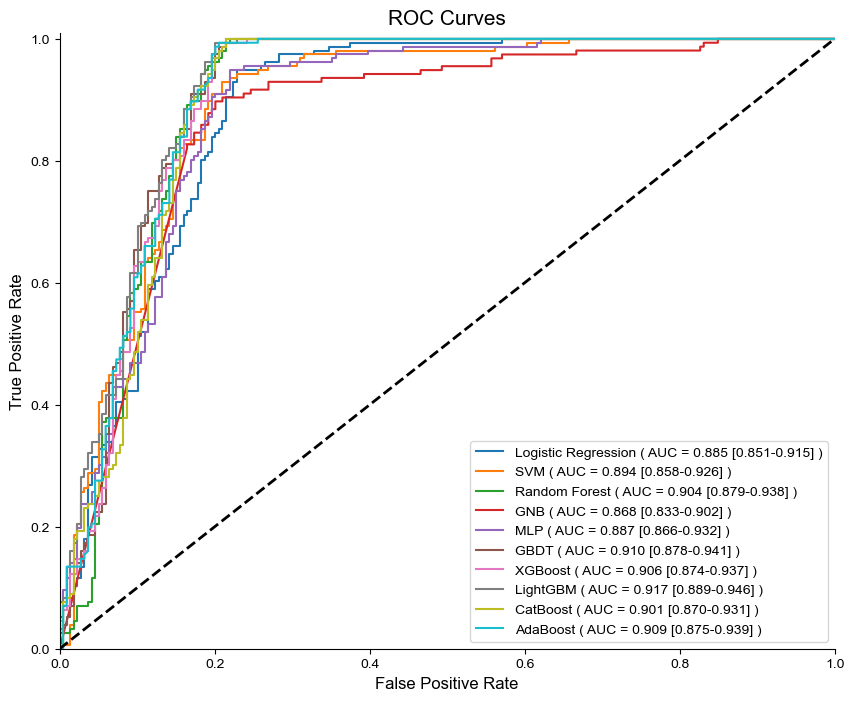

In [28]:
# 绘制ROC曲线

# 设置字体为Arial
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(10, 8))
for name, (fpr, tpr, auc) in roc_curves.items():
    lower_bound, upper_bound = conf_intervals[name]
    plt.plot(fpr, tpr, label=f'{name} ( AUC = {auc:.3f} [{lower_bound:.3f}-{upper_bound:.3f}] )')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves', fontsize=15)
plt.legend(loc='lower right')

# 移除右边和上边边界
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.grid(False)

# 保存为矢量图
plt.savefig('./allrna10折ROC.svg', format='svg')  # 保存为SVG格式
# plt.savefig('ROC_Curves.pdf', format='pdf')  # 保存为PDF格式（取消注释以使用）

plt.show()

In [30]:
# 选择 'HAMD' 非空且大于8的行
test_mirna_filtered = test_mirna[test_mirna['HAMD'].notna()]

# 将 8-20 的行标注为 0，20 以上的行标注为 1
test_mirna_filtered['HAMD'] = test_mirna_filtered['HAMD'].apply(lambda x: 0 if x < 17 else 1)

# 提取分组和特征列
y_test = test_mirna_filtered['HAMD']
X_test = test_mirna_filtered.drop(columns=['allRNA','Hospital', 'Sample_id', 'Company','Batch','group','Age', 'HAMD', 'Diagnosis', 'Gender'])
X_test

C:\Users\xurui\AppData\Local\Temp\ipykernel_101284\1723971039.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_mirna_filtered['HAMD'] = test_mirna_filtered['HAMD'].apply(lambda x: 0 if x < 17 else 1)


,hsa-let-7a-1_hsa-let-7a-3p,hsa-let-7a-1_hsa-let-7a-5p,hsa-let-7a-2_hsa-let-7a-5p,hsa-let-7a-3_hsa-let-7a-3p,hsa-let-7a-3_hsa-let-7a-5p,hsa-let-7b_hsa-let-7b-3p,hsa-let-7b_hsa-let-7b-5p,hsa-let-7c_hsa-let-7c-5p,hsa-let-7d_hsa-let-7d-3p,hsa-let-7d_hsa-let-7d-5p,...,piR-hsa-376663,piR-hsa-3784255,piR-hsa-4360657,piR-hsa-4404178,piR-hsa-4419732,piR-hsa-4493515,piR-hsa-737914,piR-hsa-7572632,piR-hsa-788844,piR-hsa-789156
0,4.636343,11.932248,11.931450,4.636343,11.931450,5.513216,14.822116,10.794625,9.237331,9.921694,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5.642016,11.510990,11.510514,5.642016,11.511823,4.577311,15.680377,11.050713,8.528478,9.391978,...,0.0,8.231833,8.815194,7.236623,12.871074,0.000000,7.236623,0.000000,7.236623,7.236623
2,5.843266,12.198160,12.197301,5.843266,12.198160,5.101686,15.676319,11.149399,8.944256,10.185719,...,0.0,8.123240,9.342672,8.858133,15.418822,9.704748,0.000000,8.123240,7.540862,9.535040
3,5.000036,11.509317,11.509071,5.000036,11.509225,4.702476,15.485785,10.862766,9.202785,9.430012,...,0.0,7.041156,8.618797,0.000000,11.674459,10.201311,0.000000,8.618797,0.000000,8.618797
4,5.536349,12.352857,12.351838,5.536349,12.352275,4.611005,15.818532,11.493653,9.369764,10.166986,...,0.0,10.128330,7.137324,9.129619,14.326783,11.651051,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,4.903505,14.585894,14.582205,4.903505,14.583900,2.802650,15.218163,10.767289,9.042298,12.161791,...,0.0,9.325308,8.840780,0.000000,13.493108,12.039607,9.392320,0.000000,0.000000,0.000000
296,4.692560,14.454422,14.450784,4.655838,14.452923,2.114599,14.889146,10.300049,9.282777,11.649711,...,0.0,10.916343,9.470173,0.000000,14.339692,13.443463,9.011503,0.000000,6.030940,8.014297
297,5.185287,14.896606,14.892002,5.181581,14.893397,3.159635,14.100503,9.906540,8.965081,11.908113,...,0.0,9.967990,9.203463,0.000000,14.088622,13.426111,9.880616,0.000000,0.000000,0.000000
304,2.914421,14.054741,14.052197,2.914421,14.052584,2.377121,15.084452,10.167180,9.578815,11.445565,...,0.0,8.926858,7.126895,0.000000,12.655918,12.246116,0.000000,0.000000,0.000000,0.000000


In [31]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
295    0
296    0
297    0
304    0
305    0
Name: HAMD, Length: 205, dtype: int64

In [32]:
X_test

,hsa-let-7a-1_hsa-let-7a-3p,hsa-let-7a-1_hsa-let-7a-5p,hsa-let-7a-2_hsa-let-7a-5p,hsa-let-7a-3_hsa-let-7a-3p,hsa-let-7a-3_hsa-let-7a-5p,hsa-let-7b_hsa-let-7b-3p,hsa-let-7b_hsa-let-7b-5p,hsa-let-7c_hsa-let-7c-5p,hsa-let-7d_hsa-let-7d-3p,hsa-let-7d_hsa-let-7d-5p,...,piR-hsa-376663,piR-hsa-3784255,piR-hsa-4360657,piR-hsa-4404178,piR-hsa-4419732,piR-hsa-4493515,piR-hsa-737914,piR-hsa-7572632,piR-hsa-788844,piR-hsa-789156
0,4.636343,11.932248,11.931450,4.636343,11.931450,5.513216,14.822116,10.794625,9.237331,9.921694,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5.642016,11.510990,11.510514,5.642016,11.511823,4.577311,15.680377,11.050713,8.528478,9.391978,...,0.0,8.231833,8.815194,7.236623,12.871074,0.000000,7.236623,0.000000,7.236623,7.236623
2,5.843266,12.198160,12.197301,5.843266,12.198160,5.101686,15.676319,11.149399,8.944256,10.185719,...,0.0,8.123240,9.342672,8.858133,15.418822,9.704748,0.000000,8.123240,7.540862,9.535040
3,5.000036,11.509317,11.509071,5.000036,11.509225,4.702476,15.485785,10.862766,9.202785,9.430012,...,0.0,7.041156,8.618797,0.000000,11.674459,10.201311,0.000000,8.618797,0.000000,8.618797
4,5.536349,12.352857,12.351838,5.536349,12.352275,4.611005,15.818532,11.493653,9.369764,10.166986,...,0.0,10.128330,7.137324,9.129619,14.326783,11.651051,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,4.903505,14.585894,14.582205,4.903505,14.583900,2.802650,15.218163,10.767289,9.042298,12.161791,...,0.0,9.325308,8.840780,0.000000,13.493108,12.039607,9.392320,0.000000,0.000000,0.000000
296,4.692560,14.454422,14.450784,4.655838,14.452923,2.114599,14.889146,10.300049,9.282777,11.649711,...,0.0,10.916343,9.470173,0.000000,14.339692,13.443463,9.011503,0.000000,6.030940,8.014297
297,5.185287,14.896606,14.892002,5.181581,14.893397,3.159635,14.100503,9.906540,8.965081,11.908113,...,0.0,9.967990,9.203463,0.000000,14.088622,13.426111,9.880616,0.000000,0.000000,0.000000
304,2.914421,14.054741,14.052197,2.914421,14.052584,2.377121,15.084452,10.167180,9.578815,11.445565,...,0.0,8.926858,7.126895,0.000000,12.655918,12.246116,0.000000,0.000000,0.000000,0.000000


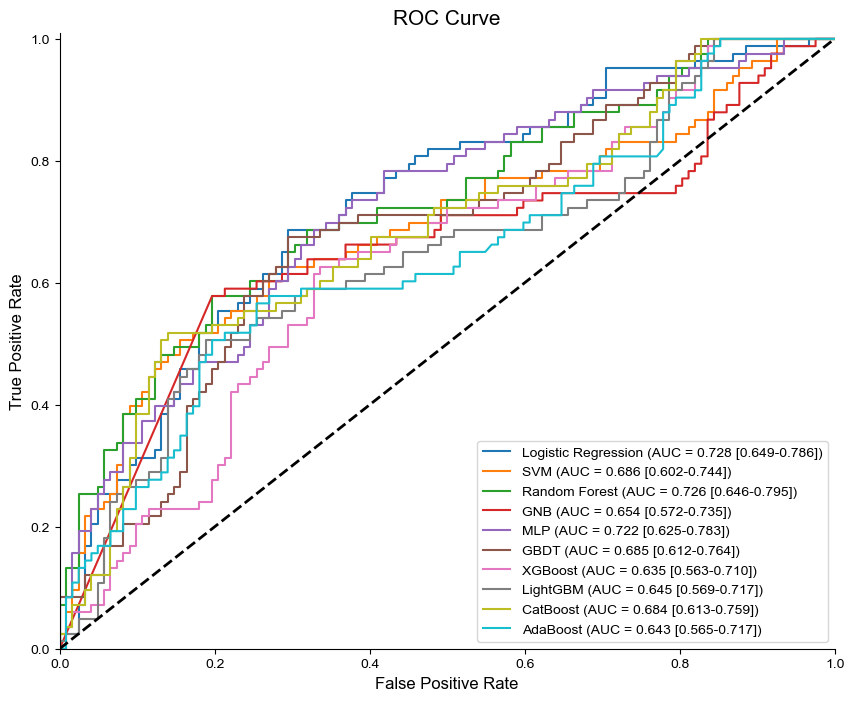

                 Model                  AUC             Accuracy  \
0  Logistic Regression  0.728 [0.649-0.786]  0.663 [0.644-0.751]   
1                  SVM  0.686 [0.602-0.744]  0.673 [0.624-0.751]   
2        Random Forest  0.726 [0.646-0.795]  0.663 [0.595-0.722]   
3                  GNB  0.654 [0.572-0.735]  0.698 [0.620-0.761]   
4                  MLP  0.722 [0.625-0.783]  0.673 [0.615-0.741]   
5                 GBDT  0.685 [0.612-0.764]  0.639 [0.576-0.702]   
6              XGBoost  0.635 [0.563-0.710]  0.541 [0.473-0.605]   
7             LightGBM  0.645 [0.569-0.717]  0.488 [0.424-0.546]   
8             CatBoost  0.684 [0.613-0.759]  0.595 [0.541-0.654]   
9             AdaBoost  0.643 [0.565-0.717]  0.493 [0.605-0.712]   

           Sensitivity          Specificity          Youden Index  \
0  0.699 [0.573-0.762]  0.639 [0.636-0.787]   0.338 [0.285-0.497]   
1  0.578 [0.344-0.558]  0.738 [0.805-0.915]   0.316 [0.176-0.431]   
2  0.699 [0.610-0.813]  0.639 [0.558-0.722] 

In [33]:
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score, confusion_matrix, precision_score, f1_score, matthews_corrcoef
import pandas as pd

# 创建一个空的列表来存储每个模型的结果
results = []

plt.figure(figsize=(10, 8))  # 创建一个新的图形

# 外部验证测试
for name, model in best_models.items():
    # 计算模型的决策函数得分，如果没有 decision_function，则使用 predict_proba
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)[:, 1]

    # 计算ROC曲线参数
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    auc = roc_auc_score(y_test, y_score)
    
    # 计算其他指标
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    ppv = precision_score(y_test, y_pred)  # PPV
    npv = tn / (tn + fn)  # NPV
    f1 = f1_score(y_test, y_pred)  # F1 Score
    mcc = matthews_corrcoef(y_test, y_pred)  # MCC
    youden_index = sensitivity + specificity - 1
    
    # 使用自举法计算AUC和其他性能指标的95%置信区间
    n_bootstraps = 1000
    auc_scores, accuracy_scores, sensitivity_scores, specificity_scores = [], [], [], []
    ppv_scores, npv_scores, f1_scores, mcc_scores, youden_index_scores = [], [], [], [], []
    
    for _ in range(n_bootstraps):
        # 自举采样
        y_test_resampled, y_score_resampled = resample(y_test, y_score, random_state=np.random.randint(1, 100))
        auc_resampled = roc_auc_score(y_test_resampled, y_score_resampled)
        auc_scores.append(auc_resampled)

        # 根据新的y_test采样重新计算性能指标
        y_pred_resampled = np.where(y_score_resampled > 0.5, 1, 0)
        accuracy_scores.append(accuracy_score(y_test_resampled, y_pred_resampled))
        sensitivity_scores.append(recall_score(y_test_resampled, y_pred_resampled))
        tn_resampled, fp_resampled, fn_resampled, tp_resampled = confusion_matrix(y_test_resampled, y_pred_resampled).ravel()
        specificity_scores.append(tn_resampled / (tn_resampled + fp_resampled))
        ppv_scores.append(precision_score(y_test_resampled, y_pred_resampled))
        npv_scores.append(tn_resampled / (tn_resampled + fn_resampled))
        f1_scores.append(f1_score(y_test_resampled, y_pred_resampled))
        mcc_scores.append(matthews_corrcoef(y_test_resampled, y_pred_resampled))
        youden_index_scores.append(sensitivity_scores[-1] + specificity_scores[-1] - 1)
    
    # 计算各项指标的95%置信区间
    def compute_ci(scores):
        sorted_scores = np.array(scores)
        sorted_scores.sort()
        lower = sorted_scores[int(0.025 * len(sorted_scores))]
        upper = sorted_scores[int(0.975 * len(sorted_scores))]
        return lower, upper
    
    auc_ci = compute_ci(auc_scores)
    accuracy_ci = compute_ci(accuracy_scores)
    sensitivity_ci = compute_ci(sensitivity_scores)
    specificity_ci = compute_ci(specificity_scores)
    ppv_ci = compute_ci(ppv_scores)
    npv_ci = compute_ci(npv_scores)
    f1_ci = compute_ci(f1_scores)
    mcc_ci = compute_ci(mcc_scores)
    youden_index_ci = compute_ci(youden_index_scores)
    
    # 绘制ROC曲线
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f} [{auc_ci[0]:.3f}-{auc_ci[1]:.3f}])')

    # 存储每个模型的结果，包括置信区间
    results.append({
        'Model': name,
        'AUC': f'{auc:.3f} [{auc_ci[0]:.3f}-{auc_ci[1]:.3f}]',
        'Accuracy': f'{accuracy:.3f} [{accuracy_ci[0]:.3f}-{accuracy_ci[1]:.3f}]',
        'Sensitivity': f'{sensitivity:.3f} [{sensitivity_ci[0]:.3f}-{sensitivity_ci[1]:.3f}]',
        'Specificity': f'{specificity:.3f} [{specificity_ci[0]:.3f}-{specificity_ci[1]:.3f}]',
        'Youden Index': f'{youden_index:.3f} [{youden_index_ci[0]:.3f}-{youden_index_ci[1]:.3f}]',
        'PPV': f'{ppv:.3f} [{ppv_ci[0]:.3f}-{ppv_ci[1]:.3f}]',
        'NPV': f'{npv:.3f} [{npv_ci[0]:.3f}-{npv_ci[1]:.3f}]',
        'F1 Score': f'{f1:.3f} [{f1_ci[0]:.3f}-{f1_ci[1]:.3f}]',
        'MCC': f'{mcc:.3f} [{mcc_ci[0]:.3f}-{mcc_ci[1]:.3f}]'
    })

# 绘制随机猜测线
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])

# 添加标签和图例
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=15)
plt.legend(loc="lower right")

# 移除右边和上边边界
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# 保存ROC曲线为矢量图
plt.savefig('./allrna外部测试ROC.svg', format='svg')

# 显示绘图
plt.show()

# 将结果转换为DataFrame并显示
results_df = pd.DataFrame(results)
print(results_df)

# 将结果数据框保存为CSV文件
results_df.to_csv('./allrna_results.csv', index=False)


NameError: name 'models_order' is not defined

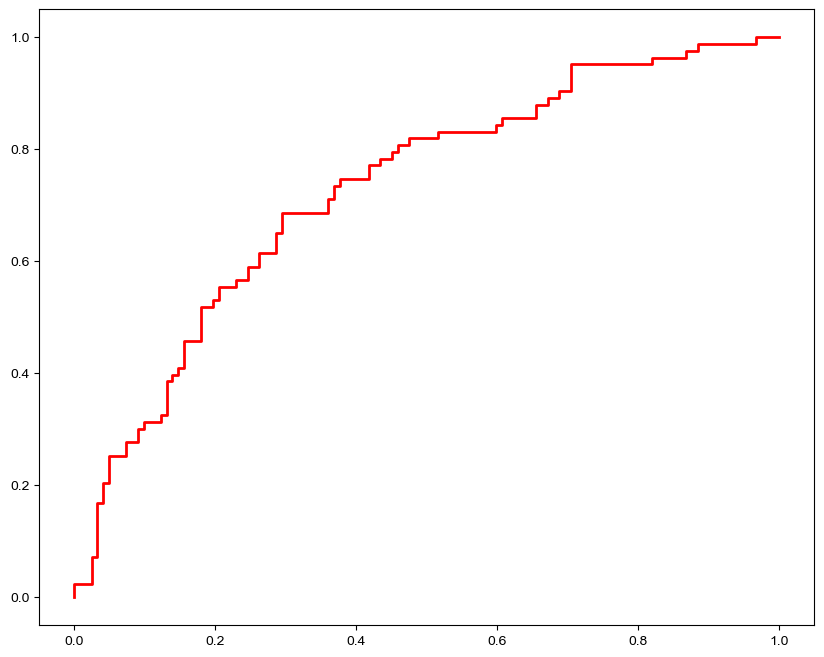

In [34]:
# 定义每个模型的固定颜色
model_colors = {
    'Random Forest': '#1f77b4',
    'AdaBoost': '#ff7f0e',
    'SVM': '#2ca02c',
    'LightGBM': '#4b0082',  # 靛蓝色
    'GBDT': '#9467bd',      # 紫罗兰色
    'XGBoost': '#8c564b',   # 棕色
    'CatBoost': '#e377c2',  # 粉色
    'Logistic Regression': '#7f7f7f',  # 灰色
    'MLP': '#bcbd22'        # 黄绿色
}

# 存储ROC数据和AUC值用于排序
roc_data = {}
results = []
threshold = 0.4

# 第一次循环：计算指标并收集数据
for name, model in best_models.items():
    # 计算模型的决策函数得分，如果没有 decision_function，则使用 predict_proba
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)[:, 1]

    # 计算ROC曲线参数
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    auc = roc_auc_score(y_test, y_score)
    # 对 y_score 进行归一化到 [0, 1]
    y_score_min = y_score.min()  # 最小值
    y_score_max = y_score.max()  # 最大值
    y_score = (y_score - y_score_min) / (y_score_max - y_score_min)
    # 计算其他指标
    y_pred = np.where(y_score > threshold, 1, 0)
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    ppv = precision_score(y_test, y_pred)  # PPV
    npv = tn / (tn + fn)  # NPV
    f1 = f1_score(y_test, y_pred)  # F1 Score
    mcc = matthews_corrcoef(y_test, y_pred)  # MCC
    youden_index = sensitivity + specificity - 1
    
    # 使用自举法计算AUC和其他性能指标的95%置信区间
    n_bootstraps = 1000
    auc_scores, accuracy_scores, sensitivity_scores, specificity_scores = [], [], [], []
    ppv_scores, npv_scores, f1_scores, mcc_scores, youden_index_scores = [], [], [], [], []
    
    for _ in range(n_bootstraps):
        # 自举采样
        y_test_resampled, y_score_resampled = resample(y_test, y_score, random_state=np.random.randint(1, 100))
        auc_resampled = roc_auc_score(y_test_resampled, y_score_resampled)
        auc_scores.append(auc_resampled)

        # 根据新的y_test采样重新计算性能指标
        y_pred_resampled = np.where(y_score_resampled > threshold, 1, 0)
        accuracy_scores.append(accuracy_score(y_test_resampled, y_pred_resampled))
        sensitivity_scores.append(recall_score(y_test_resampled, y_pred_resampled))
        tn_resampled, fp_resampled, fn_resampled, tp_resampled = confusion_matrix(y_test_resampled, y_pred_resampled).ravel()
        specificity_scores.append(tn_resampled / (tn_resampled + fp_resampled))
        ppv_scores.append(precision_score(y_test_resampled, y_pred_resampled))
        npv_scores.append(tn_resampled / (tn_resampled + fn_resampled))
        f1_scores.append(f1_score(y_test_resampled, y_pred_resampled))
        mcc_scores.append(matthews_corrcoef(y_test_resampled, y_pred_resampled))
        youden_index_scores.append(sensitivity_scores[-1] + specificity_scores[-1] - 1)
    
    # 计算各项指标的95%置信区间
    def compute_ci(scores):
        sorted_scores = np.array(scores)
        sorted_scores.sort()
        lower = sorted_scores[int(0.025 * len(sorted_scores))]
        upper = sorted_scores[int(0.975 * len(sorted_scores))]
        return lower, upper
    
    auc_ci = compute_ci(auc_scores)
    accuracy_ci = compute_ci(accuracy_scores)
    sensitivity_ci = compute_ci(sensitivity_scores)
    specificity_ci = compute_ci(specificity_scores)
    ppv_ci = compute_ci(ppv_scores)
    npv_ci = compute_ci(npv_scores)
    f1_ci = compute_ci(f1_scores)
    mcc_ci = compute_ci(mcc_scores)
    youden_index_ci = compute_ci(youden_index_scores)
    
    # 存储ROC数据
    roc_data[name] = {
        'fpr': fpr,
        'tpr': tpr,
        'auc': auc,
        'auc_ci': (auc_ci[0], auc_ci[1])  # 存储置信区间
    }

    # 存储每个模型的结果，包括置信区间
    results.append({
        'Model': name,
        'AUC': f'{auc:.3f} [{auc_ci[0]:.3f}-{auc_ci[1]:.3f}]',
        'Accuracy': f'{accuracy:.3f} [{accuracy_ci[0]:.3f}-{accuracy_ci[1]:.3f}]',
        'Sensitivity': f'{sensitivity:.3f} [{sensitivity_ci[0]:.3f}-{sensitivity_ci[1]:.3f}]',
        'Specificity': f'{specificity:.3f} [{specificity_ci[0]:.3f}-{specificity_ci[1]:.3f}]',
        'Youden Index': f'{youden_index:.3f} [{youden_index_ci[0]:.3f}-{youden_index_ci[1]:.3f}]',
        'PPV': f'{ppv:.3f} [{ppv_ci[0]:.3f}-{ppv_ci[1]:.3f}]',
        'NPV': f'{npv:.3f} [{npv_ci[0]:.3f}-{npv_ci[1]:.3f}]',
        'F1 Score': f'{f1:.3f} [{f1_ci[0]:.3f}-{f1_ci[1]:.3f}]',
        'MCC': f'{mcc:.3f} [{mcc_ci[0]:.3f}-{mcc_ci[1]:.3f}]'
    })

# 找到AUC最大的模型
max_auc_model = max(roc_data, key=lambda x: roc_data[x]['auc'])

# 创建新的figure
plt.figure(figsize=(10, 8))

# 最后绘制最大模型（红色加粗）
max_data = roc_data[max_auc_model]
plt.plot(max_data['fpr'], max_data['tpr'], 
         color='red', 
         lw=2,
         label=f"AUC={max_data['auc']:.3f} [{max_data['auc_ci'][0]:.3f}-{max_data['auc_ci'][1]:.3f}]")

# 按指定顺序绘制非最大模型
for name in models_order:
    if name == max_auc_model or name not in roc_data:
        continue
        
    data = roc_data[name]
    plt.plot(data['fpr'], data['tpr'], 
             color=model_colors[name],
             alpha=0.33, 
             lw=1,
             label=f"AUC={data['auc']:.3f} [{data['auc_ci'][0]:.3f}-{data['auc_ci'][1]:.3f}]")



# 绘制随机猜测线
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])

# 设置样式
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=15)
plt.legend(loc="lower right", frameon=False)

# 移除右边和上边边界
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# 保存结果
plt.savefig('外部测试ROC.svg', format='svg', bbox_inches='tight')
plt.show()

# 将结果转换为DataFrame并显示
results_df = pd.DataFrame(results)
print(results_df)

# 将结果数据框保存为CSV文件
results_df.to_csv('result.csv', index=False)

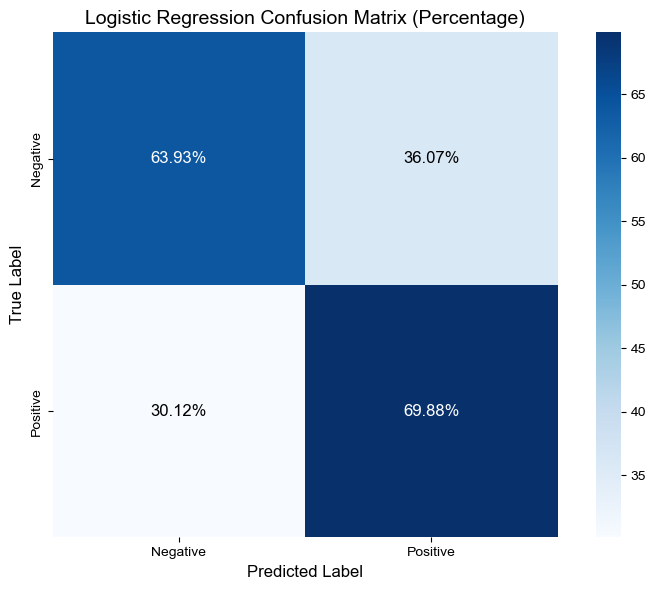

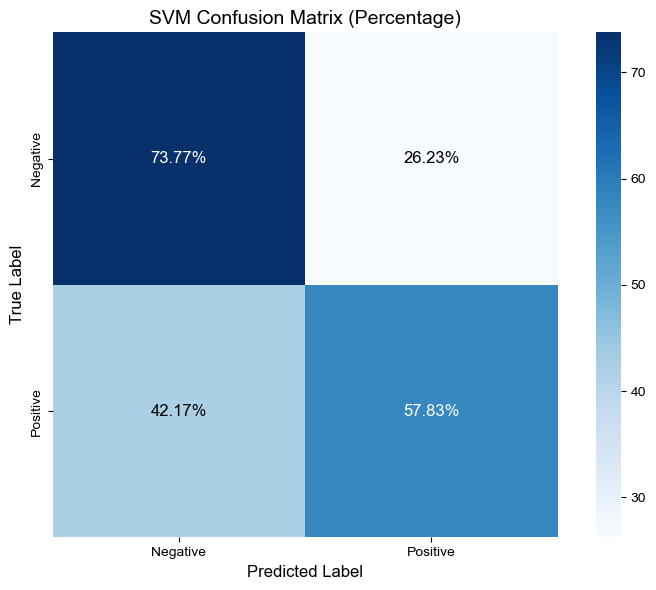

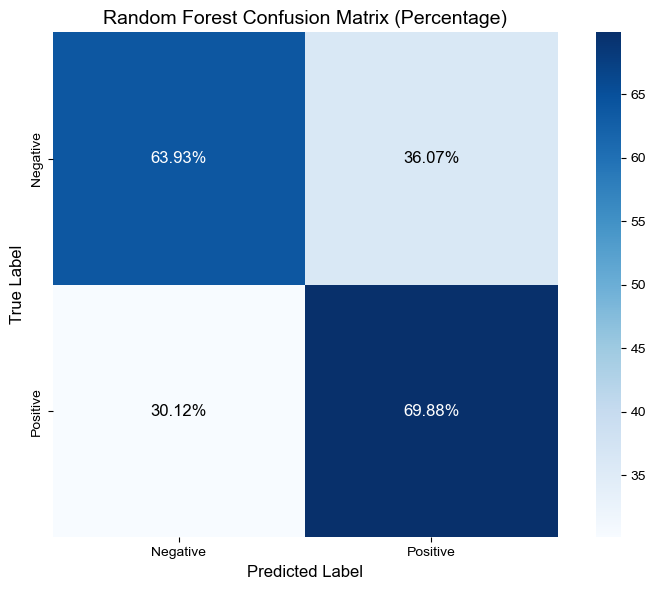

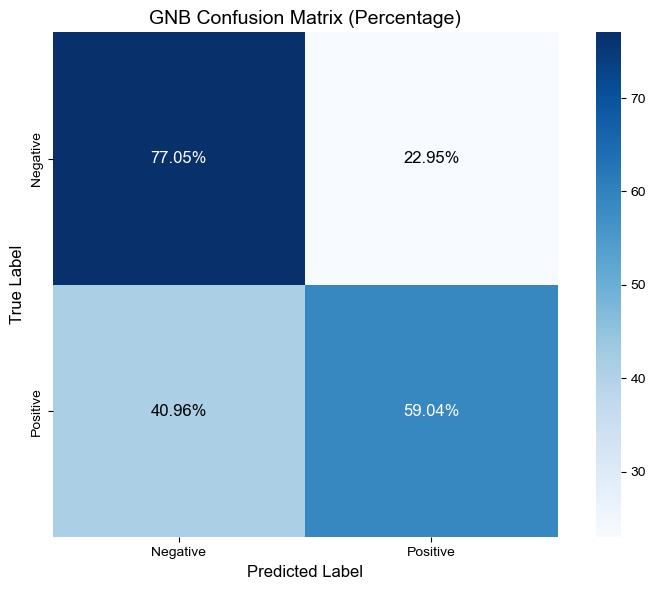

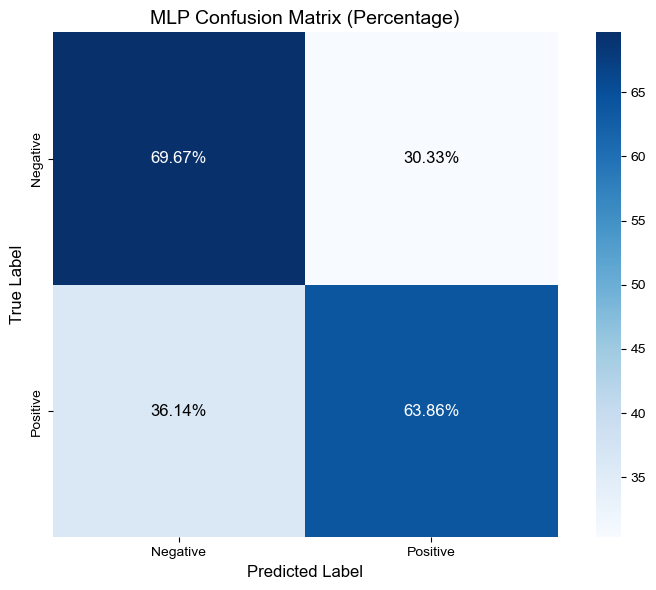

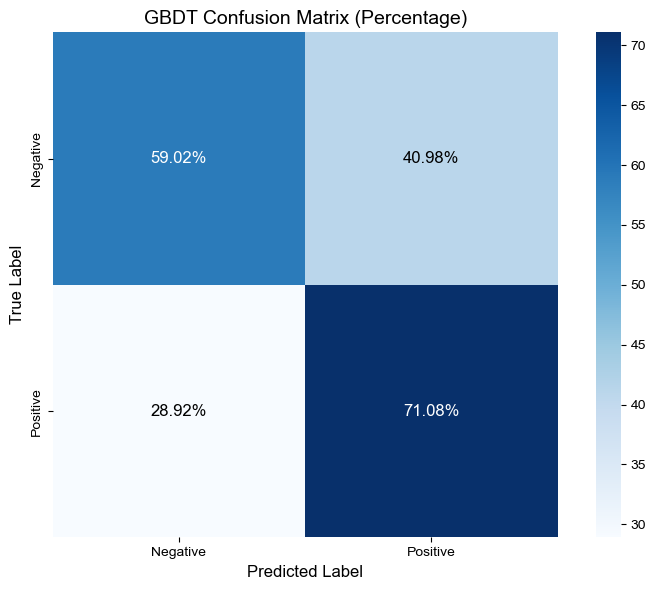

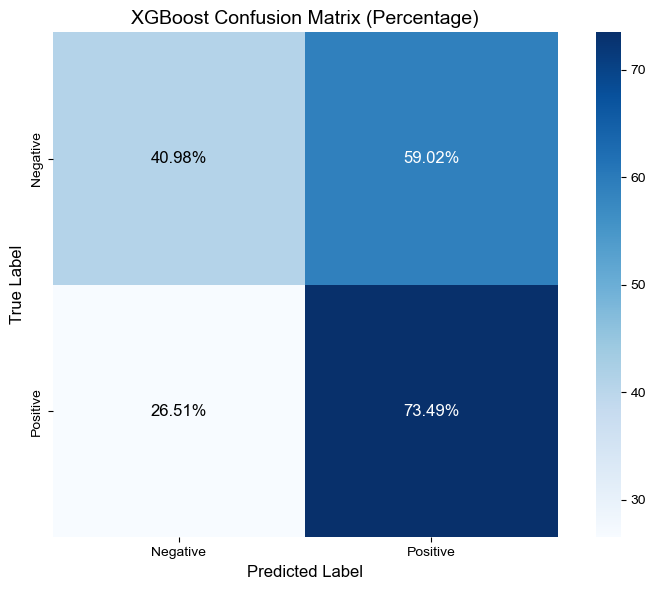

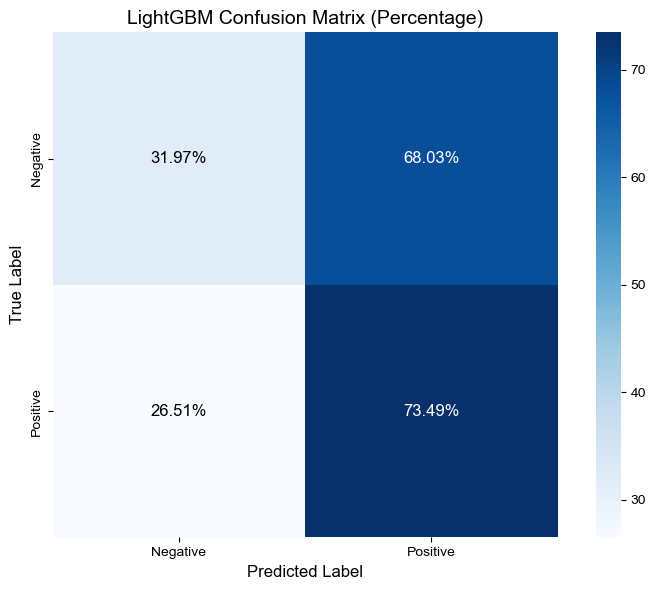

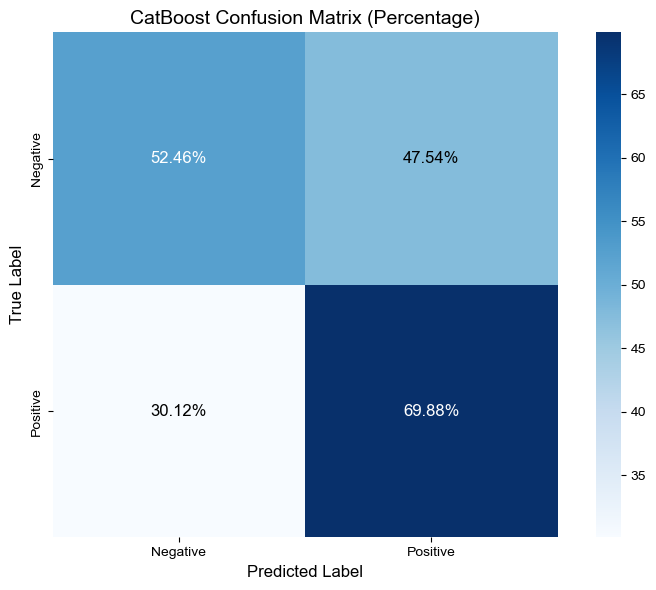

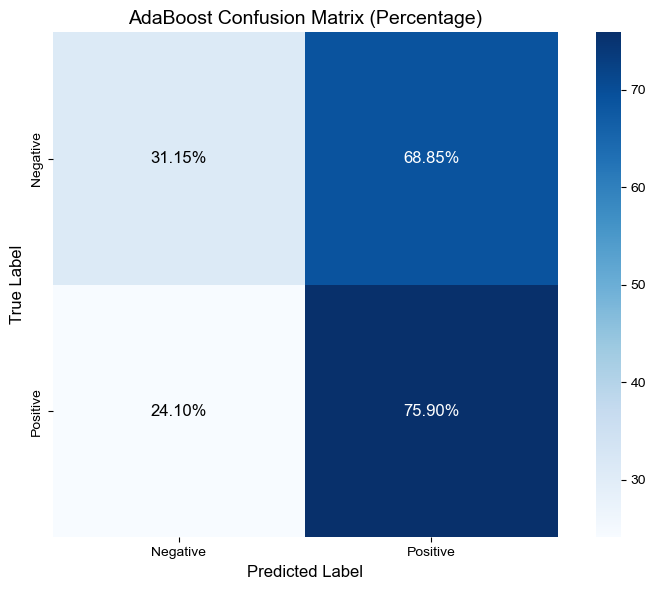

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 遍历每个模型，绘制混淆矩阵
for name, model in best_models.items():
    # 使用最佳模型进行预测
    y_test_pred = model.predict(X_test)
    
    # 计算混淆矩阵
    cm = confusion_matrix(y_test, y_test_pred)
    
    # 将混淆矩阵数值转换为百分比
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # 创建一个图形
    plt.figure(figsize=(8, 6))
    
    # 使用Seaborn的heatmap绘制混淆矩阵，数值用百分数表示
    sns.heatmap(cm_percentage, annot=False, fmt=".2f", cmap='Blues', cbar=True, square=True,
                xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'])
    
    # 添加数字到热图上，使用反色
    for i in range(cm_percentage.shape[0]):
        for j in range(cm_percentage.shape[1]):
            # 根据百分比值设置文本颜色
            color = 'black' if cm_percentage[i, j] < 50 else 'white'
            plt.text(j + 0.5, i + 0.5, f"{cm_percentage[i, j]:.2f}%", 
                     ha='center', va='center', color=color, fontsize=12)
    
    # 添加标题和标签
    plt.title(f'{name} Confusion Matrix (Percentage)', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    
    # 显示混淆矩阵
    plt.tight_layout()
    
    # 保存为文件
    plt.savefig('{name}_confusion_matrix.svg', format='svg')
    
    # 显示图像
    plt.show()



In [ ]:
import joblib

# 保存每个最佳模型
for name, model in best_models.items():
    joblib.dump(model, 'C:/Users/74101/Desktop/成人抑郁症/result/10.22/result/all_hmad/model/{name}_model.pkl')
    print(f"{name} model saved successfully.")

# 加载模型
# loaded_model = joblib.load('D:/adult_dep/new_ML/output_new/Logistic Regression_model.pkl')

In [ ]:
# 更新后
import shap
import pandas as pd

# 初始化结果存储目录
output_dir = 'C:/Users/74101/Desktop/成人抑郁症/result/10.22/result/all_hmad/'

# 特征数量
num_features = X_test.shape[1]
max_evals = 2 * num_features + 1

# 存储所有模型的 SHAP 值
shap_values_dict = {}

# 逐一处理每个模型并保存 SHAP 值为 CSV 文件
for name, model in best_models.items():
    print(f"Processing SHAP for {name}...")
    
    # 创建 SHAP 解释器
    if hasattr(model, "predict_proba"):
        explainer = shap.Explainer(model.predict_proba, mirna_feature)
    else:
        explainer = shap.Explainer(model.predict, mirna_feature)

    # 计算 SHAP 值
    shap_values = explainer(X_test, max_evals=max_evals)

    # 如果是二分类模型，选择 SHAP 值中的正类（假设类别 1）
    if len(shap_values.values.shape) == 3:
        shap_values_selected = shap_values[..., 1]  # 提取正类的 SHAP 值
    else:
        shap_values_selected = shap_values  # 对于其他模型直接使用

    # 保存 SHAP 值到字典
    shap_values_dict[name] = shap_values_selected

    # 保存 SHAP 值为 CSV 文件
    output_path_csv = f'{output_dir}allrna_{name}_shap_values.csv'
    pd.DataFrame(shap_values_selected.values, columns=X_test.columns).to_csv(output_path_csv, index=False)
    print(f"SHAP values for {name} saved to {output_path_csv}")


    # 绘制 SHAP 摘要图
    plt.figure()
    shap.summary_plot(shap_values_selected, X_test, max_display=20, show=False)

    # 保存 SHAP 图为 SVG 格式
    output_path_plot = f'{output_dir}allrna_{name}_shap.svg'
    plt.savefig(output_path_plot, format='svg')
    plt.close()
    print(f"SHAP plot for {name} saved to {output_path_plot}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# 定义颜色
start_color = np.array([0, 51, 102])  # 深蓝色
end_color = np.array([255, 140, 0])   # 橘黄色

# 生成渐变
num_colors = 10
gradient_colors = [start_color + (end_color - start_color) * (i / (num_colors - 1)) for i in range(num_colors)]
gradient_colors = np.array(gradient_colors) / 255  # 归一化为0到1

# 初始化结果存储目录
output_dir = 'C:/Users/74101/Desktop/成人抑郁症/result/10.22/result/all_hmad/'

# cmap = plt.colors.ListedColormap(['#003366', '#FF8C00'])  # 深蓝色和橘黄色
cmap = ListedColormap(gradient_colors)

# 从 CSV 文件读取 SHAP 值并绘制 SHAP 摘要图，保存为 PDF
for name in best_models.keys():
    print(f"Generating SHAP plot for {name} from CSV...")

    # 读取 CSV 文件中的 SHAP 值
    input_path_csv = f'{output_dir}allrna_{name}_shap_values.csv'
    shap_values_selected = pd.read_csv(input_path_csv)

    # 绘制 SHAP 摘要图
    plt.figure()
    shap.summary_plot(shap_values_selected.values, X_test, max_display=5, show=False, cmap = cmap)

    # 保存 SHAP 图为 PDF 格式
    output_path_pdf = f'{output_dir}allrna_{name}_shap.pdf'
    plt.savefig(output_path_pdf, format='pdf')
    plt.close()
    print(f"SHAP plot for {name} saved to {output_path_pdf}")
